Import các thư viện cần dùng:

In [147]:
import numpy as np

# Import Pandas for data manipulation using dataframes
import pandas as pd

# Import matplotlib Library for data visualisation
import matplotlib.pyplot as plt




Load dữ liệu fashion-mnist-train:

In [151]:
data = pd.read_csv(r'fashion-mnist_train.csv')
data.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ánh xạ giữa giá trị số trong cột nhãn và danh mục không được bao gồm trong tập dữ liệu, nhưng được định nghĩa như sau:
- 0 - T-shirt/top
- 1 - Trouser
- 2 - Pullover
- 3 - Dress
- 4 - Coat
- 5 - Sandal
- 6 - Shirt
- 7 - Sneaker
- 8 - Bag
- 9 - Ankle boot

Xem thông tin của dữ liệu:

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


Xem số lượng label(nhãn) duy nhất có trong cột label:

In [153]:
len(data['label'].unique())

10

Số điểm dữ liệu của mỗi nhãn (label):

In [154]:
data['label'].value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

**3.Visualizing the Data:**

Chuẩn hóa dữ liệu:

Các giá trị cột 784 pixelXXX trong mỗi hàng chứa thông tin độ sáng cho từng pixel trong hình ảnh thang độ xám 28x28. Độ sáng của pixel được lưu dưới dạng số nguyên 8 bit, nằm trong khoảng từ 0 (thường biểu thị màu đen) đến 255 (màu trắng). Các giá trị ở giữa đại diện cho các sắc thái khác nhau của màu xám. Do đó, để chuẩn hóa các giá trị, chúng ta cần chia mỗi ô pixelXXX cho 255.

In [155]:
# Save the data points as 'input_data'
input_data = data.iloc[:,1:] / 255
# Check the shape of the input data
print('Shape of the input data',input_data.shape)
# Preview a few rows
input_data.head()

Shape of the input data (60000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


Tiếp theo, tạo một dataframe khác có tên là target, chỉ bao gồm các nhãn số:

In [156]:
# Save the label(in 0-9 format) as 'target'
target = data[['label']].iloc[:, :]
# Check the shape of the label/category
print('Shape of the input label', target.shape)
# Preview a few rows
target.head()

Shape of the input label (60000, 1)


,label
0,2
1,9
2,6
3,0
4,3


Tạo mảng label nhập thủ công tên các nhãn (label):

In [157]:
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**3.1 Visualize the training images**

Chúng ta sử dụng matplotlib để vẽ 30 hình ảnh training trong dataframe input_data cùng với nhãn dán tương ứng.

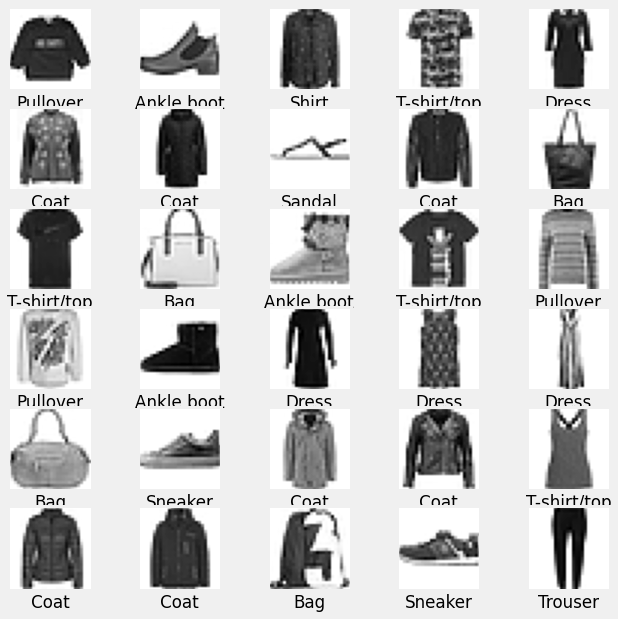

In [160]:
# Set the figure size
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(input_data.iloc[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[target.label.iloc[i]])

3.2 Visualize using Principal Component Analysis(PCA)


Phép phân tích thành phần chính (Principal Components Analysis - PCA) là một thuật toán thống kê sử dụng phép biến đổi trực giao để biến đổi một tập hợp dữ liệu từ một không gian nhiều chiều sang một không gian mới ít chiều hơn (2 hoặc 3 chiều) nhằm tối ưu hóa việc thể hiện sự biến thiên của dữ liệu.

Import các thư viện package:print_function, time, fetch_mldata, PCA, TSNE, Axes3D, sns.

In [161]:
from __future__ import print_function
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import decomposition
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Chúng tôi chuyển đổi ma trận và vectơ thành Khung dữ liệu Pandas có tên pca_df và đặt tên cho các cột 784 pixel là features để đơn giản gọi nhiều cột cùng một lúc.

In [162]:
# Give multiple pixel columns one name: features
features = ['pixel' + str(i+1) for i in range(input_data.shape[1]) ]
# Create a new DataFrame df
pca_df = pd.DataFrame(input_data, columns=features)
# Add an additional column 'y', identical with label values in data
pca_df['label'] = target['label']

print('Size of the dataframe: {}'.format(pca_df.shape))

Size of the dataframe: (60000, 785)


In [163]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(pca_df.shape[0]):
    # Extract the label for comparison
    if pca_df['label'][i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif pca_df['label'][i] == 1:
        results.append('Trouser')
    elif pca_df['label'][i] == 2:
        results.append('Pullover')
    elif pca_df['label'][i] == 3:
        results.append('Dress')
    elif pca_df['label'][i] == 4:
        results.append('Coat')
    elif pca_df['label'][i] == 5:
        results.append('Sandal')
    elif pca_df['label'][i] == 6:
        results.append('Shirt')
    elif pca_df['label'][i] == 7:
        results.append('Sneaker')
    elif pca_df['label'][i] == 8:
        results.append('Bag')
    elif pca_df['label'][i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(pca_df['label'][i]))

# Create a new column named result which has all meaningful results        
pca_df['result'] = results

In [164]:
pca_df = pca_df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

Trong sổ ghi chép này, chúng tôi sử dụng triển khai Scikit-Learn của PCA để tạo các ô hai và ba chiều từ 784 kích thước ban đầu (mỗi pixel là một kích thước), vì vậy chúng tôi chọn n_components = 3, ba thành phần chính đầu tiên. Hãy xem có bao nhiêu biến thể trong toàn bộ tập dữ liệu được giải thích bởi các thành phần chính này.

In [165]:
# Set first three principle components
pca = PCA(n_components=3)
# Fit the model with pixel columns and apply the dimensionality reduction on those columns
pca_result = pca.fit_transform(pca_df[features].values)

Như chúng ta thấy thì chiều không gian của dữ liệu đã giảm từ 785 xuống thành 3:

In [169]:
pca_result.shape

(60000, 3)

Tham số pca.explained_variance_ratio_ trả về một vectơ phương sai được giải thích bởi mỗi thứ nguyên.

In [167]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.29011353 0.17727668 0.060227  ]


Thêm các giá trị PCA ba chiều dưới dạng các cột vào khung dữ liệu pca_df, đặt tên cho chúng là First Dimension,Second Dimension,Third Dimension.

In [170]:
pca_df['First Dimension'] = pca_result[:,0]
pca_df['Second Dimension'] = pca_result[:,1] 
pca_df['Third Dimension'] = pca_result[:,2]

In [171]:
pca_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel780,pixel781,pixel782,pixel783,pixel784,label,result,First Dimension,Second Dimension,Third Dimension
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,2,Pullover,3.686333,4.960529,-0.051232
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,9,Ankle boot,-4.376434,3.861059,-1.949432
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,6,Shirt,7.265152,1.568757,2.315238
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.003922,0.0,0.0,0.0,0.0,0,T-shirt/top,3.227788,-2.325256,-0.649303
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,3,Dress,4.146373,-4.039080,-1.515244


Bây giờ, hãy hình dung 3 vectơ nguyên tắc đầu tiên trong phân tích thành phần nguyên tắc.

Text(0.5, 0.98, '3-Component PCA')

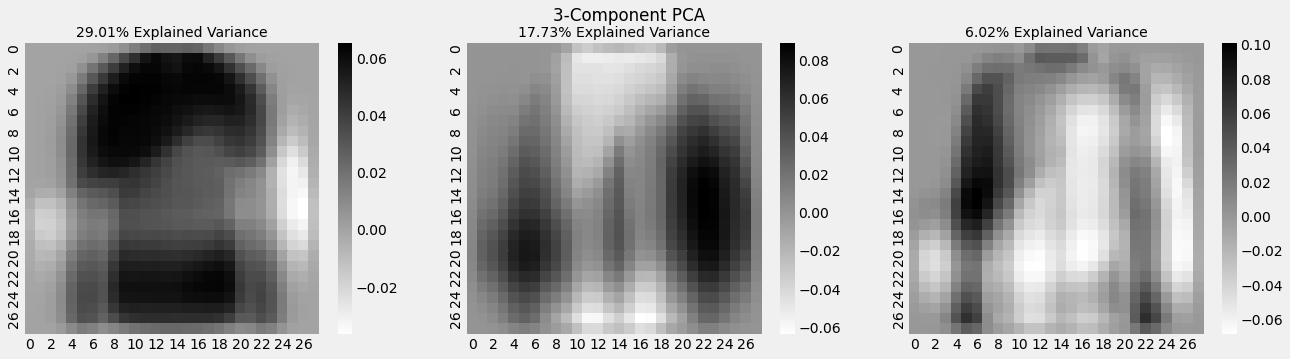

In [172]:
# Set the graph style as 'fivethirtyeight'
plt.style.use('fivethirtyeight')
#Set figure size
fig, axarr = plt.subplots(1, 3, figsize=(20, 5))
# use seaborn heatmap to visualize the first three pca components
sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0], cmap=plt.cm.binary)
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1], cmap=plt.cm.binary)
sns.heatmap(pca.components_[2, :].reshape(28, 28), ax=axarr[2], cmap=plt.cm.binary)
# Set picture title to explained variance
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100), fontsize=14)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100), fontsize=14)
axarr[2].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100), fontsize=14)
# Add picture title
plt.suptitle('3-Component PCA')

- The first dimension giải thích 29% dữ liệu pixel và các biến thể bên trong trông như T-Shirt và Shoe.
- The second dimension giải thích khoảng 17% dữ liệu pixel và các biến thể bên trong trông như Trouser và Pullover.
- The third dimension chỉ giải thích 6% dữ liệu pixel và các biến thể bên trong trông như Pullover và Ankle boot. 

In [173]:
# initializing the pca
# Set n_components as 784 dimensions
pca = decomposition.PCA(n_components = 784)
# Fit on training data
pca_784 = pca.fit_transform(pca_df[features].values)
#percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
var_ratios = np.cumsum(pca.explained_variance_ratio_)

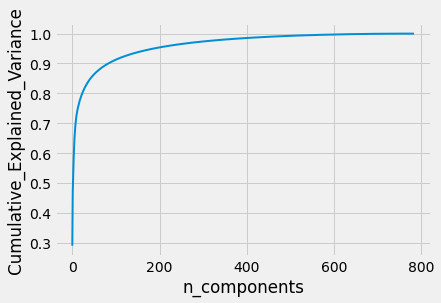

In [174]:
# Plot the PCA spectrum
plt.figure(figsize=(6, 4))
plt.plot(var_ratios, linewidth=2)
plt.xlabel("n_components")
plt.ylabel("Cumulative_Explained_Variance")
plt.show()

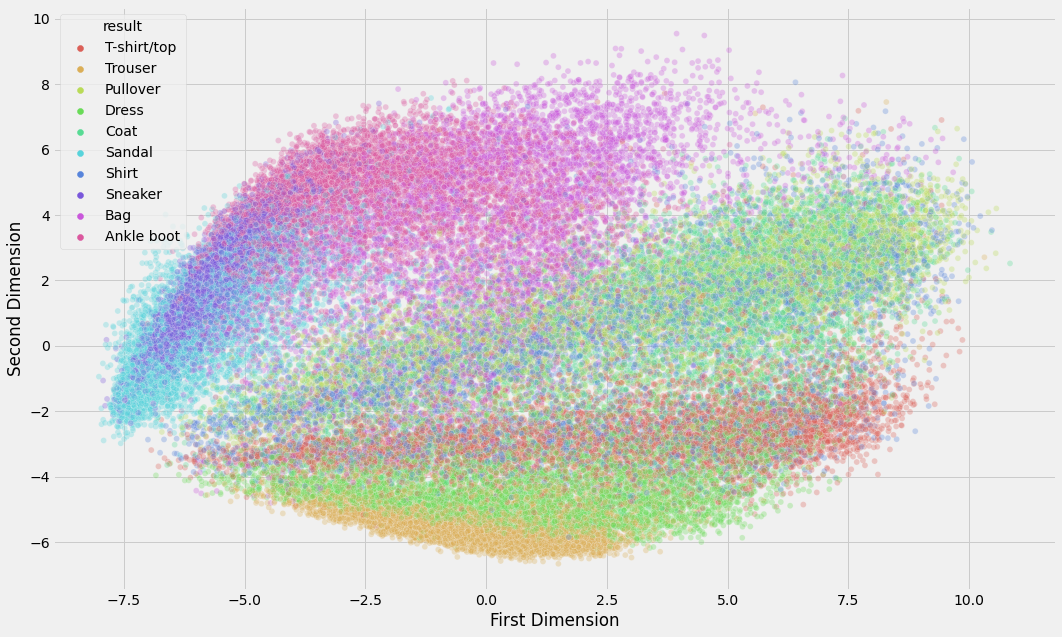

In [175]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="First Dimension", y="Second Dimension",
    hue = "result",
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=pca_df,
    legend="full",
    alpha=0.3
)

Từ biểu đồ trên, chúng ta có thể thấy 2 components có thể tách biệt các loại khác nhau ở một mức độ nào đó, nhưng sự tách biệt không đủ rõ ràng.

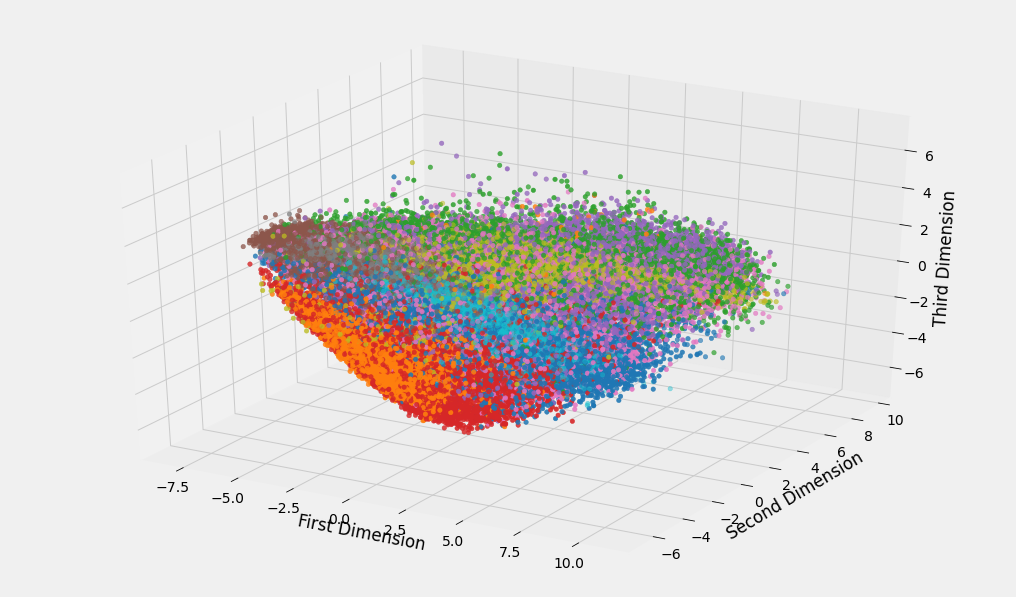

In [176]:
graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=pca_df["First Dimension"], 
    ys=pca_df["Second Dimension"], 
    zs=pca_df["Third Dimension"], 
    c=pca_df["label"], 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

Hình ảnh ba chiều cũng không thể tách biệt đầy đủ các danh mục. Chúng ta cần một kỹ thuật hiệu quả hơn.

3.3 Visualize using t-Distributed Stochastic Neighbouring Entities

t-Distributed Stochastic Neighbouring Entities (t-SNE) là một thuật toán học máy có thể giảm số lượng chiều hiệu quả hơn.Phương pháp này đặc biệt tốt cho việc trực quan hóa các bộ dữ liệu đa chiều.

In [177]:
# Create a random generator, so to decreases potential biases in the data
rand = np.random.permutation(pca_df.shape[0])

In [178]:
# Pull 60000 pictures out of the sample
N = 60000
pca_df_subset = pca_df.loc[rand[:N],:].copy()
data_subset = pca_df_subset[features].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
pca_df_subset['First Dimension'] = pca_result[:,0]
pca_df_subset['Second Dimension'] = pca_result[:,1] 
pca_df_subset['Third Dimension'] = pca_result[:,2]
print('Explained variation in each principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation in each principal component: [0.29011353 0.17727668 0.060227  ]


In [181]:
# Keep track of time elapsed in the method
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE finished! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.088s...
[t-SNE] Computed neighbors for 60000 samples in 247.931s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for 

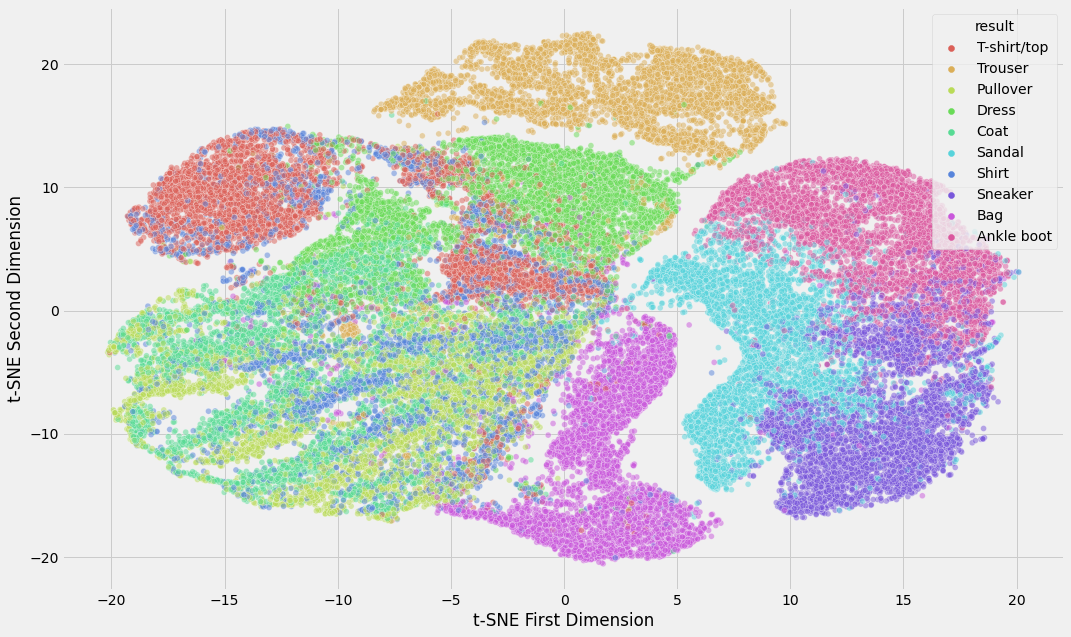

In [185]:
pca_df_subset['t-SNE First Dimension'] = tsne_results[:,0]
pca_df_subset['t-SNE Second Dimension'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="t-SNE First Dimension", y="t-SNE Second Dimension",
    hue="result",
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=pca_df_subset,
    legend="full",
    alpha=0.5
)